# 5
## 5.2
### 5.2.2

In [1]:
# List 5-4

import os, shutil

original_dataset_dir = '/home/takao/Documents/dev/jupyter/DL-By-Python-Keras/5-kaggle-original-data/train'

base_dir = '/home/takao/Documents/dev/jupyter/DL-By-Python-Keras/5-cat_and_dog_small'
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

# 訓練用ぬこ
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir):
    os.mkdir(train_cats_dir)

# 訓練用イッヌ
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# 検証用ぬこ
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# 検証用イッヌ
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# test用ぬこ
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir):
    os.mkdir(test_cats_dir)

# test用イッヌ
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir):
    os.mkdir(test_dogs_dir)


# ぬこ
# 最初の千個をコピー
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 次の500個を validation にコピー
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 次の500個を test にコピー
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

    
# イッヌ
# 最初の千個をコピー
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 次の500個を validation にコピー
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 次の500個を test にコピー
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [2]:
print('total training ぬこ images', len(os.listdir(train_cats_dir)))

total training ぬこ images 1000


In [3]:
print('total training イッヌ images', len(os.listdir(train_dogs_dir)))

total training イッヌ images 1000


In [4]:
print('total validation ぬこ images', len(os.listdir(validation_cats_dir)))

total validation ぬこ images 500


In [5]:
print('total validation イッヌ images', len(os.listdir(validation_dogs_dir)))

total validation イッヌ images 500


In [6]:
print('total test ぬこ images', len(os.listdir(test_cats_dir)))

total test ぬこ images 500


In [7]:
print('total test イッヌ images', len(os.listdir(test_dogs_dir)))

total test イッヌ images 500


In [8]:
# List 5-5

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0816 16:48:03.639794 140226406588544 deprecation.py:506] From /home/takao/.pyenv/versions/3.7.4/envs/Jupyter/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
# List 5-6

from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

W0816 16:48:03.802899 140226406588544 deprecation.py:323] From /home/takao/.pyenv/versions/3.7.4/envs/Jupyter/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# List 5-7

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [13]:
# List 5-8
if not os.path.isfile('5-cats_and_dog_small_1.h5'):
    history = model.fit_generator(train_generator,
                                  steps_per_epoch=100,
                                  epochs=30,
                                  validation_data=validation_generator,
                                  validation_steps=50)

Epoch 1/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6894 - acc: 0.5400 - val_loss: 0.6795 - val_acc: 0.5540
Epoch 2/30
100/100 [==============================] - 7s 68ms/step - loss: 0.6632 - acc: 0.5955 - val_loss: 0.6473 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6207 - acc: 0.6480 - val_loss: 0.6564 - val_acc: 0.6200
Epoch 4/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5775 - acc: 0.6940 - val_loss: 0.5923 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 7s 72ms/step - loss: 0.5419 - acc: 0.7275 - val_loss: 0.6803 - val_acc: 0.6270
Epoch 6/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5108 - acc: 0.7505 - val_loss: 0.6419 - val_acc: 0.6640
Epoch 7/30
100/100 [==============================] - 7s 68ms/step - loss: 0.4831 - acc: 0.7710 - val_loss: 0.5877 - val_acc: 0.6830
Epoch 8/30
100/100 [==============================] - 7s 66ms/step - 

In [14]:
# List 5-9
if not os.path.isfile('5-cats_and_dog_small_1.h5'):
    model.save('5-cats_and_dog_small_1.h5')

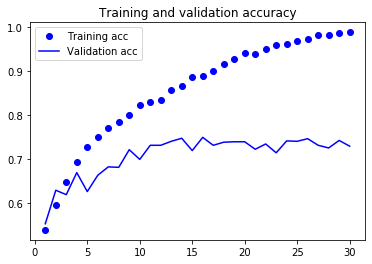

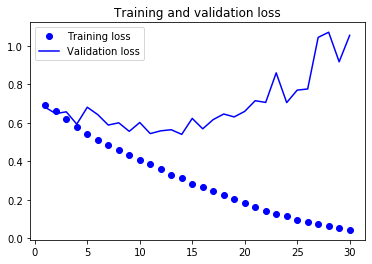

In [15]:
# List 5-10

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
# List 5-11

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

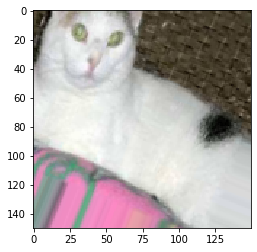

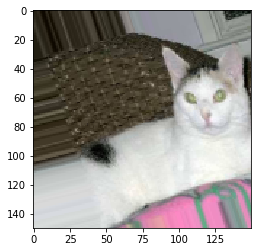

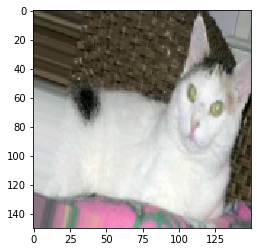

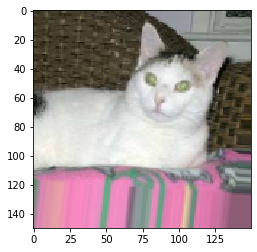

In [17]:
# List 5-12

from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) 
         for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break;
        
plt.show()

In [18]:
# List 5-13

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [19]:
# List 5-14
if not os.path.isfile('5-cats_and_dogs_small_2.h5'):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='binary')
    validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='binary')

    history = model.fit_generator(train_generator,
                                  steps_per_epoch=100,
                                  epochs=100,
                                  validation_data=validation_generator,
                                  validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6914 - acc: 0.5126 - val_loss: 0.7090 - val_acc: 0.4987
Epoch 2/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6783 - acc: 0.5593 - val_loss: 0.6540 - val_acc: 0.6003
Epoch 3/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6619 - acc: 0.5936 - val_loss: 0.6382 - val_acc: 0.6225
Epoch 4/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6410 - acc: 0.6183 - val_loss: 0.6155 - val_acc: 0.6726
Epoch 5/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6203 - acc: 0.6504 - val_loss: 0.6313 - val_acc: 0.6269
Epoch 6/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6054 - acc: 0.6718 - val_loss: 0.5814 - val_acc: 0.6840
Epoch 7/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6064 - acc: 0.6711 -

In [20]:
if not os.path.isfile('5-cats_and_dogs_small_2.h5'):
    model.save('5-cats_and_dogs_small_2.h5')

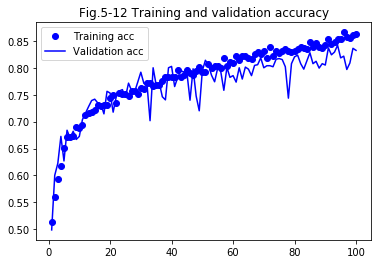

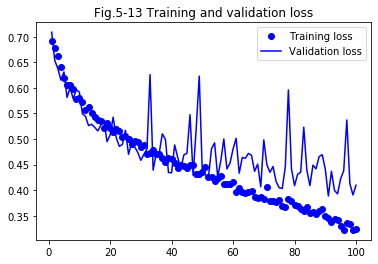

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Fig.5-12 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Fig.5-13 Training and validation loss')
plt.legend()

plt.show()